<a href="https://colab.research.google.com/github/saisumedha/FMML-PROJECTS_AND_LABS/blob/main/MODULE03_LAB04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

In [2]:
cancer = datasets.load_breast_cancer(as_frame=True)

In [3]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [4]:
cancer.frame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [5]:
X = cancer.data
y = cancer.target

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 17)

SECTION 1.1

In [7]:
neighbors = []
scores_list = []

for k in range(1, 25):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    scores_list.append(scores)

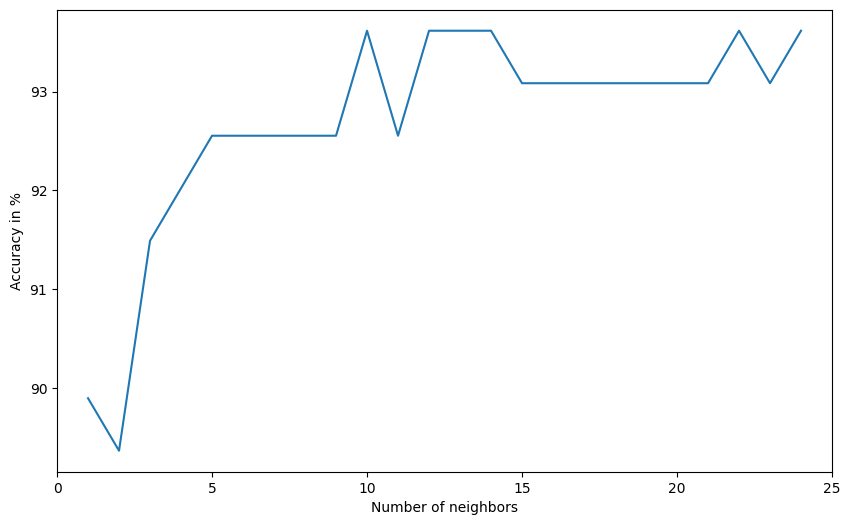

In [8]:
Accuracy = [x*100 for x in scores_list]
# plot Accuracy versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlim([0, 25])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy in %')
plt.show()

In [9]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(max_acc)
print(optimal_ks)

93.61702127659575
[10, 12, 13, 14, 22, 24]


In [10]:
## AUC-ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

def plot_roc(y_test,predicted):
  y_scores = predicted
  fpr, tpr, threshold = roc_curve(y_test, y_scores)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.show()

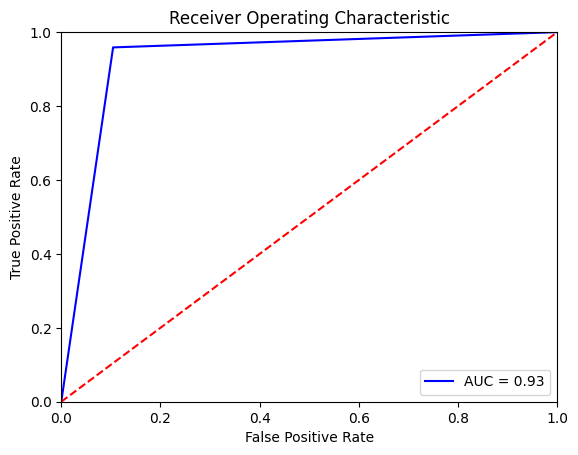

In [11]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
plot_roc(y_test,predictions)

SECTION 1.2

In [12]:
## Changing the random_state value so that data is split differently
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1089)

In [13]:
neighbors = []
scores_list = []

for k in range(1, 25):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    scores_list.append(scores)

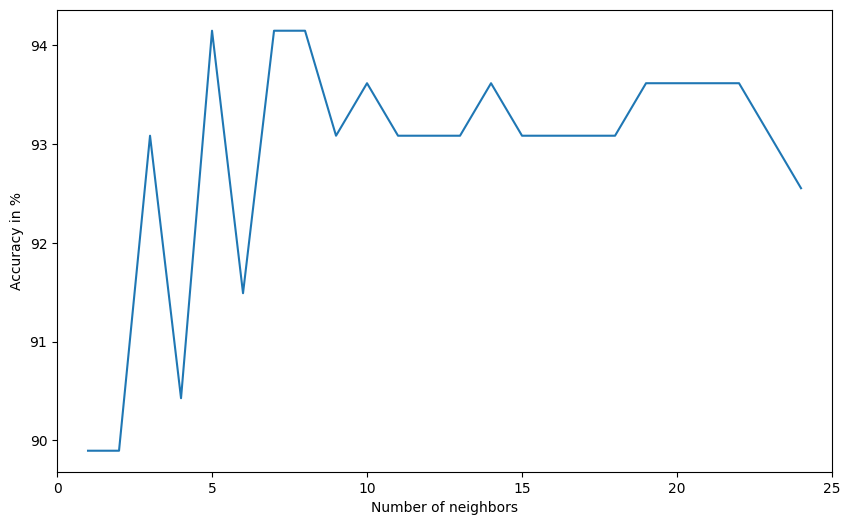

In [14]:
Accuracy = [x*100 for x in scores_list]
# plot Accuracy versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlim([0, 25])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy in %')
plt.show()

In [15]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(max_acc)
print(optimal_ks)

94.14893617021278
[5, 7, 8]


SECTION2  Cross Validation

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 17)

In [17]:
from sklearn.model_selection import KFold
from statistics import mean
kf = KFold(n_splits=10)
cv_scores = []
neighbors = []
for k in range(1,25):
  knn = KNeighborsClassifier(n_neighbors = k)
  neighbors.append(k)
  acclist = []
  for train_index, test_index in kf.split(X_train, y_train):
    x_train_fold, x_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    knn.fit(x_train_fold, y_train_fold)
    acclist.append(knn.score(x_test_fold, y_test_fold))
  cv_scores.append(mean(acclist))

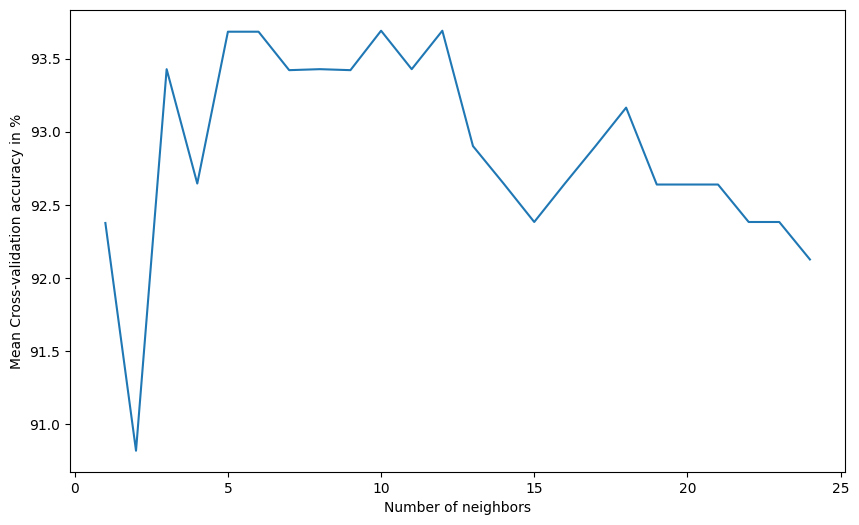

In [18]:
Accuracy = [x*100 for x in cv_scores]

# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlabel('Number of neighbors')
plt.ylabel('Mean Cross-validation accuracy in %')
plt.show()

In [19]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(optimal_ks)

[10, 12]


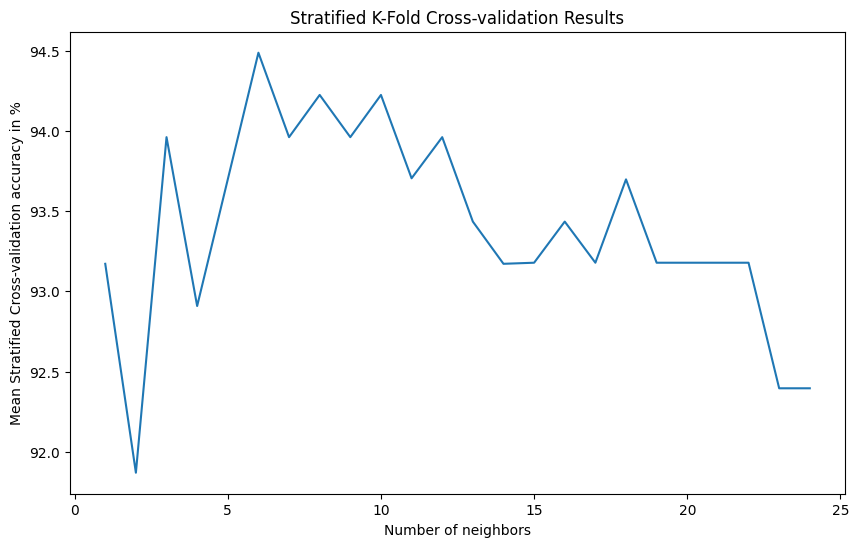

Optimal k values (Stratified K-Fold): [6]


In [20]:
#TASK1

from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from statistics import mean
import matplotlib.pyplot as plt

# We already have X_train and y_train

# Number of neighbors to try
k_values = list(range(1, 25))

# Initializing StratifiedKFold with 10 splits
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=17)

# Lists to store results
cv_scores_stratified = []
neighbors_stratified = []

# Loop over different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    neighbors_stratified.append(k)

    acclist = []

    # Loop over folds using StratifiedKFold
    for train_index, test_index in stratified_kfold.split(X_train, y_train):
        x_train_fold, x_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        knn.fit(x_train_fold, y_train_fold)
        acclist.append(knn.score(x_test_fold, y_test_fold))

    cv_scores_stratified.append(mean(acclist))

# Converting accuracy to percentage
accuracy_stratified = [acc * 100 for acc in cv_scores_stratified]

# Ploting the results
plt.figure(figsize=(10, 6))
plt.plot(neighbors_stratified, accuracy_stratified)
plt.xlabel('Number of neighbors')
plt.ylabel('Mean Stratified Cross-validation accuracy in %')
plt.title('Stratified K-Fold Cross-validation Results')
plt.show()

# Determining the best k
max_acc_stratified = max(accuracy_stratified)
optimal_ks_stratified = [neighbors_stratified[i] for i, j in enumerate(accuracy_stratified) if j == max_acc_stratified]
print("Optimal k values (Stratified K-Fold):", optimal_ks_stratified)


Section 3: Standardization

In [21]:
X = cancer.data
y = cancer.target

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.33, random_state = 17)

In [24]:
neighbors = []
scores_list = []

for k in range(1, 25):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    scores_list.append(scores)

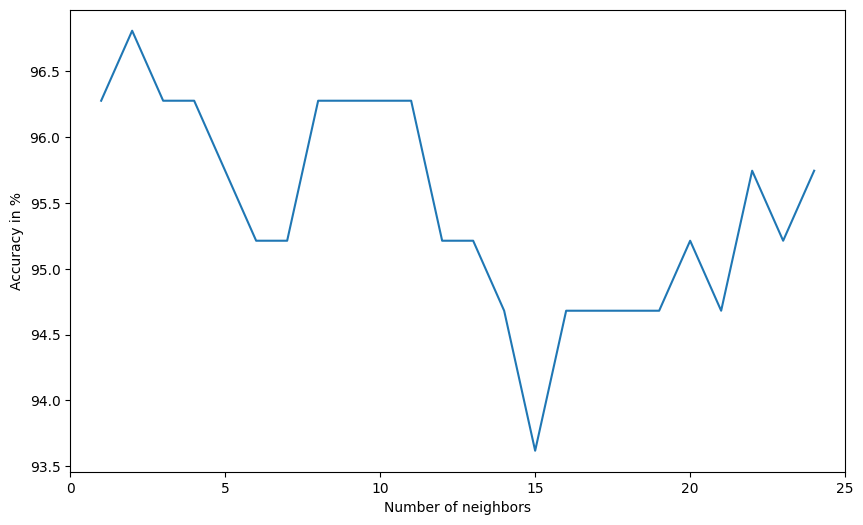

In [25]:
Accuracy = [x*100 for x in scores_list]
# plot Accuracy versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlim([0, 25])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy in %')
plt.show()

In [26]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(max_acc)
print(optimal_ks)

96.80851063829788
[2]


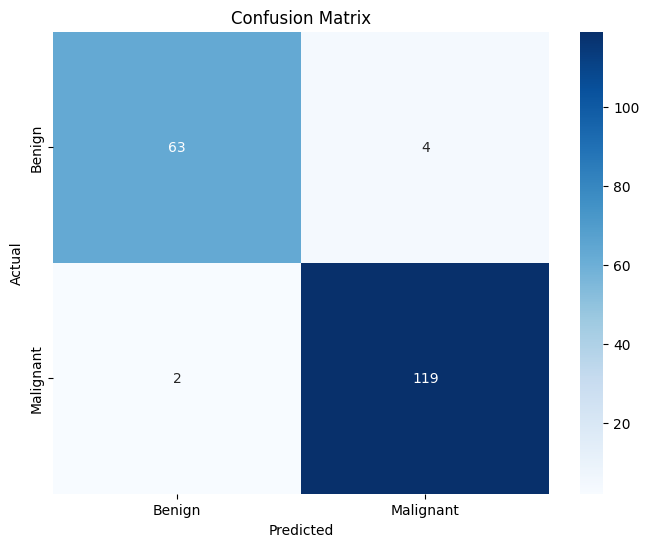

Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.94      0.95        67
   Malignant       0.97      0.98      0.98       121

    accuracy                           0.97       188
   macro avg       0.97      0.96      0.96       188
weighted avg       0.97      0.97      0.97       188



In [27]:
#TASK 2

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# We have the optimal value of k stored in 'optimal_ks'
optimal_k = optimal_ks[0]  # we choose the first value if there are multiple optimal k values

# Train the KNN model with the optimal value of k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

# Making predictions on the test set
y_pred = knn_optimal.predict(X_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
print("Classification Report:")
print(report)


In [28]:
#TASK 3

from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# X and y (original, not scaled) datasets
X = cancer.data
y = cancer.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the optimal k (you can use the one you found earlier)
optimal_k = optimal_ks[0]

# Initialize the KNN classifier with the optimal k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# Initialize K-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=17)

# Perform K-Fold Cross-Validation
cv_scores = cross_val_score(knn_optimal, X_scaled, y, cv=kf)

# Display the results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", np.mean(cv_scores))


Cross-Validation Scores: [0.9122807  0.96491228 0.98245614 0.96491228 0.94736842 0.96491228
 0.98245614 0.94736842 0.92982456 0.96428571]
Mean Cross-Validation Accuracy: 0.9560776942355889


1)**Instead of using cross-validation, we could also split our dataset into three sets- train, validation, and test set. The training proceeds on the training set, after which evaluation** **is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test se**t **bold text**.
**What do you think are the pros/cons of this method**?

**ANS:**



**Pros of Train-Validation-Test Split:**
1. Simplicity and Intuition.
2. Computationally Efficient for Small Datasets.
3. Useful for Model Selection and Hyperparameter Tuning.

**Cons of Train-Validation-Test Split:**
1. Reduced Training Data.
2. Sensitivity to Initial Split.
3. Risk of Overfitting to Validation Set.
4. Potential Data Imbalance Issues.

the train-validation-test split is a common and practical method, especially when data is limited. However, careful consideration must be given to the initial split, and it's essential to strike a balance between having enough data for training and ensuring reliable model evaluation on unseen data. Cross-validation remains a valuable alternative, especially when data is abundant, and I want to make the most of my available samples for training and evaluation.

**2)Is K-Fold cross validation an exhaustive or non-exhaustive cross validation method ? Justify your answer.**

ANS:

K-Fold cross-validation is a non-exhaustive cross-validation method. In K-Fold cross-validation, the dataset is divided into K folds, and the model is trained and evaluated K times, each time using a different fold as the test set and the remaining folds as the training set.

it offers a balanced approach between using all data for training and providing a robust evaluation without exhaustively testing on every possible combination, making it computationally efficient and effective for larger datasets.





